# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# !pip install citipy

  Running setup.py bdist_wheel for citipy: started
  Running setup.py bdist_wheel for citipy: finished with status 'done'
  Stored in directory: C:\Users\samue\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['upernavik',
 'mocambique',
 'ushuaia',
 'manono',
 'xuddur',
 'taolanaro',
 'tuktoyaktuk',
 'bathsheba',
 'yellowknife',
 'faanui',
 'cherskiy',
 'roma',
 'hithadhoo',
 'qaanaaq',
 'talnakh',
 'kapaa',
 'butaritari',
 'sola',
 'itacoatiara',
 'kudahuvadhoo',
 'lavrentiya',
 'chuy',
 'taburi',
 'constitucion',
 'barentsburg',
 'alofi',
 'illoqqortoormiut',
 'stonewall',
 'ust-omchug',
 'brainerd',
 'puerto ayora',
 'nikolskoye',
 'sabang',
 'castro',
 'cape town',
 'punta arenas',
 'ternate',
 'atuona',
 'arraial do cabo',
 'rikitea',
 'araouane',
 'georgetown',
 'cadillac',
 'barrow',
 'jalu',
 'grindavik',
 'samusu',
 'chokurdakh',
 'port hardy',
 'albany',
 'cidreira',
 'avarua',
 'codrington',
 'ergani',
 'karratha',
 'pisco',
 'sofiysk',
 'amderma',
 'lorengau',
 'khatanga',
 'hilo',
 'bredasdorp',
 'aklavik',
 'mahebourg',
 'inhambane',
 'abnub',
 'new norfolk',
 'cap malheureux',
 'nouadhibou',
 'jamestown',
 'palabuhanratu',
 'dalby',
 'mutsu',
 'ornskoldsvik',
 'mansa',
 'por

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}
owm.get_current(cities[0], **settings)

{'coord': {'lon': -56.15, 'lat': 72.79},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 19.2,
  'pressure': 1012.68,
  'humidity': 100,
  'temp_min': 19.2,
  'temp_max': 19.2,
  'sea_level': 1016.06,
  'grnd_level': 1012.68},
 'wind': {'speed': 9.08, 'deg': 1.00037},
 'clouds': {'all': 88},
 'dt': 1542356116,
 'sys': {'message': 0.0037, 'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'id': 3418910,
 'name': 'Upernavik',
 'cod': 200}

In [4]:
trial = cities[0:5]
trial

['upernavik', 'mocambique', 'ushuaia', 'manono', 'xuddur']

In [5]:
city_list = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
fail_list = []
country = []
counter = 1

for city in cities:
    try:
        print(f'Processing record {counter} of {len(cities)}. City being processed: {city}.')
        current_city = owm.get_current(city, **settings)
        city_list.append(current_city['name'])
        lat.append(current_city['coord']['lat'])
        lon.append(current_city['coord']['lon'])
        temp.append(current_city['main']['temp'])
        humidity.append(current_city['main']['humidity'])
        cloudiness.append(current_city['clouds']['all'])
        wind_speed.append(current_city['wind']['speed'])
        country.append(current_city['sys']['country'])
        counter = counter + 1
    except:
        fail_list.append(city)
        print(f'Processing FAIL. {city} added to list of fails.')
        counter = counter + 1

Processing record 1 of 605. City being processed: upernavik.
Processing record 2 of 605. City being processed: mocambique.
Processing FAIL. mocambique added to list of fails.
Processing record 3 of 605. City being processed: ushuaia.
Processing record 4 of 605. City being processed: manono.
Processing record 5 of 605. City being processed: xuddur.
Processing record 6 of 605. City being processed: taolanaro.
Processing FAIL. taolanaro added to list of fails.
Processing record 7 of 605. City being processed: tuktoyaktuk.
Processing record 8 of 605. City being processed: bathsheba.
Processing record 9 of 605. City being processed: yellowknife.
Processing record 10 of 605. City being processed: faanui.
Processing record 11 of 605. City being processed: cherskiy.
Processing record 12 of 605. City being processed: roma.
Processing record 13 of 605. City being processed: hithadhoo.
Processing record 14 of 605. City being processed: qaanaaq.
Processing record 15 of 605. City being processed: t

Processing record 124 of 605. City being processed: northam.
Processing record 125 of 605. City being processed: tasbuget.
Processing FAIL. tasbuget added to list of fails.
Processing record 126 of 605. City being processed: marco.
Processing record 127 of 605. City being processed: nome.
Processing record 128 of 605. City being processed: nyanza.
Processing record 129 of 605. City being processed: san quintin.
Processing record 130 of 605. City being processed: road town.
Processing record 131 of 605. City being processed: vryburg.
Processing record 132 of 605. City being processed: port hedland.
Processing record 133 of 605. City being processed: shingu.
Processing record 134 of 605. City being processed: hambantota.
Processing record 135 of 605. City being processed: grand river south east.
Processing FAIL. grand river south east added to list of fails.
Processing record 136 of 605. City being processed: awjilah.
Processing record 137 of 605. City being processed: raudeberg.
Process

Processing record 246 of 605. City being processed: banyo.
Processing record 247 of 605. City being processed: luderitz.
Processing record 248 of 605. City being processed: hegra.
Processing record 249 of 605. City being processed: buala.
Processing record 250 of 605. City being processed: faya.
Processing record 251 of 605. City being processed: kirakira.
Processing record 252 of 605. City being processed: kjollefjord.
Processing record 253 of 605. City being processed: saint anthony.
Processing record 254 of 605. City being processed: hasaki.
Processing record 255 of 605. City being processed: santiago de cao.
Processing record 256 of 605. City being processed: nguiu.
Processing FAIL. nguiu added to list of fails.
Processing record 257 of 605. City being processed: portobelo.
Processing record 258 of 605. City being processed: murgab.
Processing record 259 of 605. City being processed: frankfort.
Processing record 260 of 605. City being processed: aizkraukle.
Processing record 261 of

Processing record 371 of 605. City being processed: barbar.
Processing FAIL. barbar added to list of fails.
Processing record 372 of 605. City being processed: solnechnyy.
Processing record 373 of 605. City being processed: bilibino.
Processing record 374 of 605. City being processed: ostrovnoy.
Processing record 375 of 605. City being processed: lata.
Processing record 376 of 605. City being processed: caravelas.
Processing record 377 of 605. City being processed: unai.
Processing record 378 of 605. City being processed: pokrovsk.
Processing record 379 of 605. City being processed: pucallpa.
Processing record 380 of 605. City being processed: tiarei.
Processing record 381 of 605. City being processed: sakata.
Processing record 382 of 605. City being processed: cabedelo.
Processing record 383 of 605. City being processed: omagari.
Processing record 384 of 605. City being processed: saint-joseph.
Processing record 385 of 605. City being processed: kegayli.
Processing FAIL. kegayli added

Processing record 493 of 605. City being processed: callaway.
Processing record 494 of 605. City being processed: coquimbo.
Processing record 495 of 605. City being processed: chernyshevskiy.
Processing record 496 of 605. City being processed: adolfo lopez mateos.
Processing record 497 of 605. City being processed: acandi.
Processing record 498 of 605. City being processed: hervey bay.
Processing record 499 of 605. City being processed: aykhal.
Processing record 500 of 605. City being processed: coahuayana.
Processing record 501 of 605. City being processed: paamiut.
Processing record 502 of 605. City being processed: qaqortoq.
Processing record 503 of 605. City being processed: lompoc.
Processing record 504 of 605. City being processed: dalvik.
Processing record 505 of 605. City being processed: pallasovka.
Processing record 506 of 605. City being processed: fort nelson.
Processing record 507 of 605. City being processed: waddan.
Processing record 508 of 605. City being processed: bud

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
city_dict = {
    'city': city_list,
    'country': country,
    'lat': lat,
    'lon': lon,
    'temp': temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind_speed': wind_speed
}
city_df = pd.DataFrame(city_dict)
type(city_df['lat'][0])
city_df.replace(r'\\n', '', regex=True, inplace = True)
city_df.head()

,city,country,lat,lon,temp,humidity,cloudiness,wind_speed
0,Upernavik,GL,72.79,-56.15,19.20,100,88,9.08
1,Ushuaia,AR,-54.81,-68.31,35.60,93,75,18.34
2,Manono,CD,-7.30,27.40,79.41,84,80,4.50
3,Xuddur,SO,4.12,43.89,71.31,100,92,7.63
4,Tuktoyaktuk,CA,69.44,-133.03,-3.22,77,8,11.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

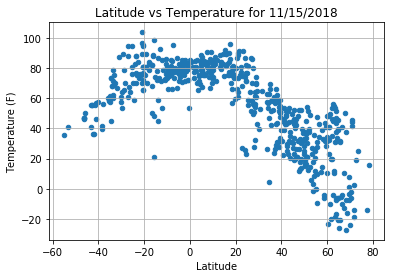

In [42]:
temp_plot = city_df.plot('lat', 'temp', kind = 'scatter', grid = True, title = 'Latitude vs Temperature for 11/15/2018')
temp_plot.set_xlabel('Latitude')
temp_plot.set_ylabel('Temperature (F)')
plt.savefig('temp.png')

#### Latitude vs. Humidity Plot

In [ ]:
humidity_plot = city_df.plot('lat', 'humidity', kind = 'scatter', grid = True, title = 'Latitude vs Humidity for 11/15/2018')
humidity_plot.set_xlabel('Latitude')
humidity_plot.set_ylabel('Humidity (%)')
plt.savefig('humidity.png')

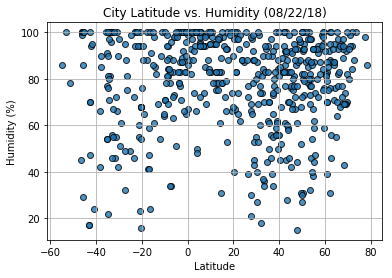

#### Latitude vs. Cloudiness Plot

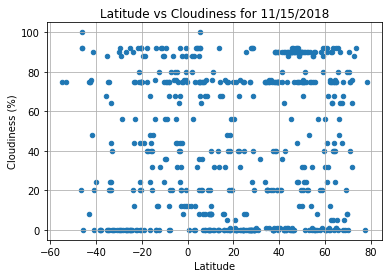

In [43]:
cloudiness_plot = city_df.plot('lat', 'cloudiness', kind = 'scatter', grid = True, title = 'Latitude vs Cloudiness for 11/15/2018')
cloudiness_plot.set_xlabel('Latitude')
cloudiness_plot.set_ylabel('Cloudiness (%)')
plt.savefig('cloudiness.png')

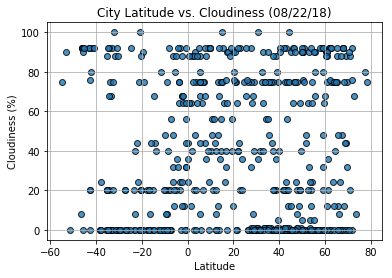

#### Latitude vs. Wind Speed Plot

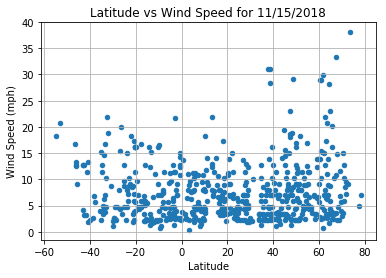

In [44]:
wind_plot = city_df.plot('lat', 'wind_speed', kind = 'scatter', grid = True, title = 'Latitude vs Wind Speed for 11/15/2018')
wind_plot.set_xlabel('Latitude')
wind_plot.set_ylabel('Wind Speed (mph)')
plt.savefig('wind.png')

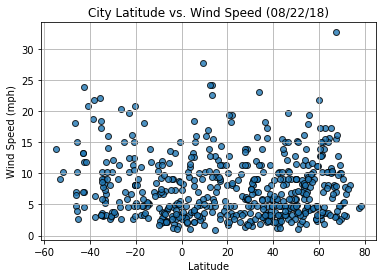